# Actividad

- **Nombre**: Andrea Bravo
- **Matrícula**: A01028579
-**Nombre**: Ricardo Gasque
-**Matricula**: A00827747
-**Nombre**: Viviana Vilchis
-**Matricula**: A00826414
# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [53]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd 'drive/MyDrive/TecSem2/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/TecSem2/SemanaTec/Repos/arte-analitica


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

presion_df=pd.read_csv('data/presion.csv')
presion_df.head()

,edad,presion,Unnamed: 2
0,56,148,NaN
1,45,120,NaN
2,72,159,NaN
3,36,118,NaN
4,63,146,NaN


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión



Text(0.5, 1.0, 'Gráfica lineal de edad contra presión arterial')

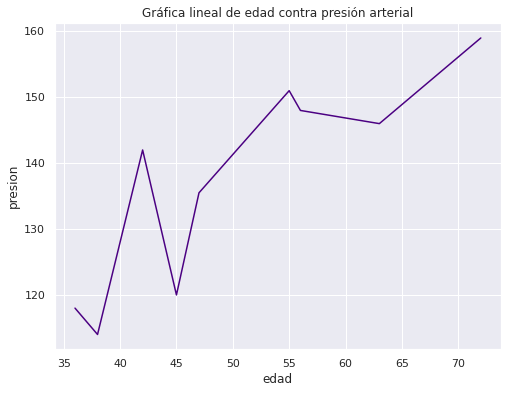

In [55]:
fig=plt.figure(figsize=(8,6))
sns.lineplot(data=presion_df,x='edad', y='presion', ci=None,color='Indigo')
plt.title('Gráfica lineal de edad contra presión arterial')

3. Genera una regresión lineal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

In [56]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(presion_df[['edad']],presion_df['presion'])
print('a:', model.coef_)
print('b:', model.intercept_)

a: [1.14833319]
b: 79.36850719269533


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


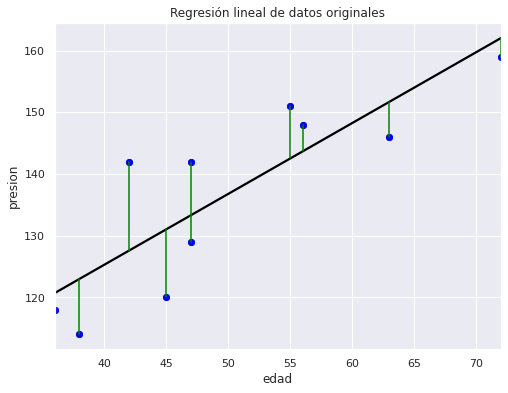

In [ ]:
fig =plt.figure(figsize=(8,6))
sns.regplot(data=presion_df, x='edad', y='presion',ci=None, color='Black')
plt.scatter(presion_df.edad, presion_df.presion, color='Blue')
plt.title('Regresión lineal de datos originales')
#Falta saber como agregar las lineas de error
x=presion_df.edad
y=presion_df.presion
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="Green");

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular=76

def presion(edad):
  a=model.coef_
  b=model.intercept_
  return a*edad+b


presion(edad_calcular)

array([166.64182961])

**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [ ]:
negocio=pd.read_csv('data/AdvmiNegocio.csv')
negocio = negocio.iloc[:, 1::]
negocio.head()

,Redes,Youtube,TV,sales
0,6903,1134,2076,663
1,1335,1179,1353,312
2,516,1377,2079,279
3,4545,1239,1755,555
4,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


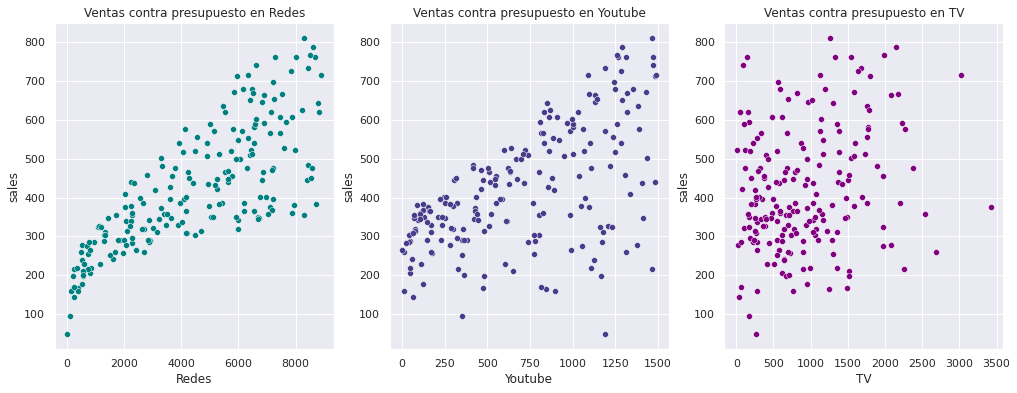

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(17,6))
a=sns.scatterplot(data=negocio, x='Redes',y='sales', ax=axs[0], color='Teal')
b=sns.scatterplot(data=negocio, x='Youtube',y='sales', ax=axs[1], color='Darkslateblue')
c=sns.scatterplot(data=negocio, x='TV',y='sales', ax=axs[2], color='Purple')
a.title.set_text('Ventas contra presupuesto en Redes')
b.title.set_text('Ventas contra presupuesto en Youtube')
c.title.set_text('Ventas contra presupuesto en TV')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

*Andrea Bravo*

A pesar de que todos los datos  tienen mucho ruido, el presupuesto de redes es el que sigue la regresión más lineal. Se puede ver una tendencia positiva que muestra como a mayor presupuesto en redes mayores son las ventas. El presupuesto de TV es en el que menor relacion se observa no se ve una dependecia clara entre las ventas y el presupuesto de gasto en TV. El presupuesto de Youtube tiene una cierta linealidad con tendencia hacia arriba pero hay muchos datos atípicos que jalan la regresión hacia abajo.

*Viviana*

Aunque todos los datos que se observan son dificiles de leer, los que cuentan con la regresión más lineal son los de redes. Podemos decir que como hay una tendencia positiva en redes, entre mayor dinero se invierta en estas más ventas hay. Lo cual no ocurre con TV y Youtube.

*Ricardo* 

Despues de analizar los datos obtenidos por la regresion lineal con respecto la las ventas dependiendo del marketing realizado ya sea TV, Redes o Youtube se puede observar como las Redes sobrepasan por mucho los otros dos metodos este se puede asumir a que hubo una mayor inversion en esta area.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

In [ ]:
from sklearn.linear_model import LinearRegression
model_RV=LinearRegression()
model_RV.fit(negocio[['Redes']], negocio['sales'])
print('Redes')
print('beta_0: ', model_RV.intercept_)
print('beta_1: ', model_RV.coef_)
print('Score: ', model_RV.score(negocio[['Redes']], negocio['sales']), '\n')

model_TVV=LinearRegression()
model_TVV.fit(negocio[['TV']], negocio['sales'])
print('TV')
print('beta_0: ', model_TVV.intercept_)
print('beta_1: ', model_TVV.coef_)
print('Score: ', model_TVV.score(negocio[['TV']], negocio['sales']), '\n')

model_YTV=LinearRegression()
model_YTV.fit(negocio[['Youtube']], negocio['sales'])
print('Youtube')
print('beta_0: ', model_YTV.intercept_)
print('beta_1: ', model_YTV.coef_)
print('Score: ', model_YTV.score(negocio[['Youtube']], negocio['sales']), '\n')

Redes
beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  0.611875050850071 

TV
beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494 

Youtube
beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536 



5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

El mejor modelo es el de Redes con un score de 61.2%. En segundo lugar queda el modelo de Youtube con un score de 33.2%. El peor modelo de acuerdo al score es de de TV, con un score de 5.2%. 

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



In [ ]:
def score_adj(x, y, model):
    return 1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

model_RYTV = LinearRegression()
model_RYTV.fit(negocio[['Redes', 'Youtube']], negocio['sales'])
print('Redes y Youtube')
print('beta_0: ', model_RYTV.intercept_)
print('betas: ', model_RYTV.coef_)
print('Score: ', model_RYTV.score(negocio[['Redes', 'Youtube']], negocio['sales']))
print('Score ajustado:', score_adj(negocio[['Redes', 'Youtube']],
                                   negocio['sales'], model_RYTV), '\n')

model_RTVV = LinearRegression()
model_RTVV.fit(negocio[['Redes', 'TV']], negocio['sales'])
print('Redes y TV')
print('beta_0: ', model_RTVV.intercept_)
print('betas: ', model_RTVV.coef_)
print('Score: ', model_RTVV.score(negocio[['Redes', 'TV']], negocio['sales']))
print('Score ajustado:', score_adj(negocio[['Redes', 'TV']],
                                   negocio['sales'], model_RTVV), '\n')

model_YTTV = LinearRegression()
model_YTTV.fit(negocio[['TV', 'Youtube']], negocio['sales'])
print('TV y Youtube')
print('beta_0: ', model_YTTV.intercept_)
print('betas: ', model_YTTV.coef_)
print('Score: ', model_YTTV.score(negocio[['TV', 'Youtube']], negocio['sales']))
print('Score ajustado:', score_adj(negocio[['TV', 'Youtube']],
                                   negocio['sales'], model_YTTV), '\n')
model_YTR = LinearRegression()
model_YTR.fit(negocio[['TV','Redes','Youtube']], negocio['sales'])
print('TV, Redes y Youtube')
print('beta_0: ', model_YTR.intercept_)
print('betas: ', model_YTR.coef_)
print('Score: ', model_YTR.score(negocio[['TV','Redes','Youtube']], negocio['sales']))
print('Score ajustado:', score_adj(negocio[['TV','Redes', 'Youtube']], 
                                   negocio['sales'], model_YTR))

Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 

Redes y TV
beta_0:  173.24843903734896
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271
Score ajustado: 0.6422399150864777 

TV y Youtube
beta_0:  275.6676137758969
betas:  [0.00664417 0.19904459]
Score:  0.33270518395032256
Score ajustado: 0.3259306172899198 

TV, Redes y Youtube
beta_0:  88.16668108378269
betas:  [-0.00103749  0.04576465  0.18853002]
Score:  0.8972106381789521
Score ajustado: 0.8956373316204667


7.  ¿Cuál modelo es el que nos conviene elegir?

*Andrea Bravo*

El modelo que conviene elegir es el de Redes y Youtbe, ya que es el que tiene el score ajustado más alto. Aunque al considerar los tres presupuestos el score ajustado es casi el mismo, al final queda una milésima menor y nos ahorramos el utilizar los datos de TV que en total tienen mucho ruido y no permiten hacer un buen pronóstico. Se puede ver en todos los scores que considerar TV baja el índice, por lo que la mejor opción va a ser el modelo que ignora el presupuesto destinado a TV.

*Viviana*

Lo más acertado sería elegir el modelo de Redes y Youtube, esto se debe a que tiene el puntaje más alto de todos. Es más conveniente el de redes ya que nos ahorra tener que utilizar los datos de TV que son confusos. 

*Ricardo* 

Para los tres modelos realizados y despues de analizar estos modelos se puede concluir que los modelos de Redes y Youtube son la mejor opcion ya que tienen una puntuacion mas alta a comparacion de el modelo de TV aparte que este modelo tiene datos muy variados que afectan el modelo por lo tanto lo mejor seria ignorar este modelo para tener un meor modelo en general.

